<a href="https://colab.research.google.com/github/Lailaehab/QRcode-preprocessing-decoding-project/blob/main/combined_TestCases_Preprocessing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
!pip install --upgrade reedsolo
import reedsolo as rs

### **Test** **Cases**

test case 2


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

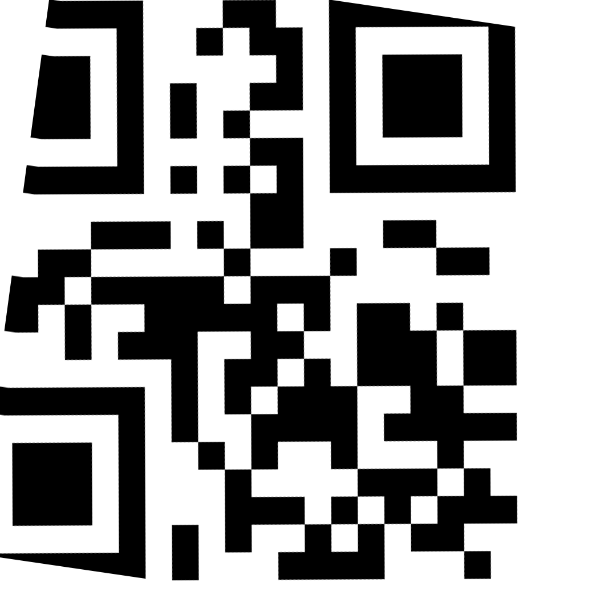

In [ ]:
import cv2
import numpy as np

def rotate_qr_code(image, shift_x):
    """
    Rotate the QR code in the image based on the detected lines using Hough transform and move the frame to the right.
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)

    # Compute the angle of tilt
    angles = []
    for line in lines:
        rho, theta = line[0]
        angles.append(theta)

    median_angle = np.median(angles)
    angle_deg = np.degrees(median_angle) - 90  # subtract 90 to make it clockwise rotation

    # Rotate the QR code only
    height, width = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((width / 2 + shift_x, height / 2), angle_deg, 1)

    # Apply translation to move the frame to the right
    rotation_matrix[0, 2] += shift_x

    # Apply replicate padding
    pad_size = shift_x
    padded_image = cv2.copyMakeBorder(image, 0, 0, pad_size, pad_size, cv2.BORDER_REPLICATE)

    # Create a white canvas of the same size as the input image
    white_canvas = np.ones_like(image) * 255

    # Rotate the image and blend it onto the white canvas with white border
    rotated_image = cv2.warpAffine(padded_image, rotation_matrix, (width + pad_size * 2, height), borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255))
    rotated_on_white = cv2.warpAffine(white_canvas, rotation_matrix, (width + pad_size * 2, height), borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255))

    # Mask out the rotated QR code from the white canvas
    result = cv2.bitwise_and(rotated_image, rotated_image, mask=cv2.cvtColor(rotated_on_white, cv2.COLOR_BGR2GRAY))

    return result

# Load the QR code image
image = cv2.imread('/content/02-Matsawar-3edel-ya3am.png')

# Move the frame to the right by 20 pixels
shift_x = 20

# Rotate the QR code only based on detected lines and move the frame to the right
rotated_qr_code = rotate_qr_code(image, shift_x)

# Resize the image to 600x600
resized_image = cv2.resize(rotated_qr_code, (600, 600))

# Save the resized image
cv2.imwrite('2edited.jpg', resized_image)

# Display the resized image
cv2_imshow(resized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

test case 3

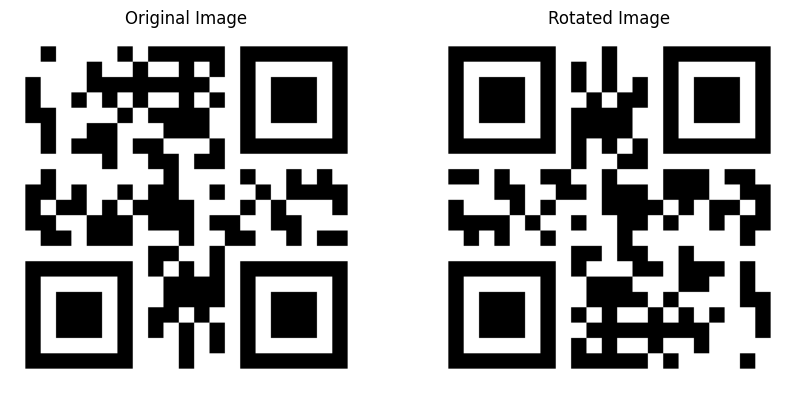

In [ ]:
image_180= cv2.imread("/content/03-Leffy-bina-ya-donya.png", cv2.IMREAD_GRAYSCALE)

_, image_180 = cv2.threshold(image_180, 128, 255, cv2.THRESH_BINARY)

rotated_image = cv2.rotate(image_180, cv2.ROTATE_180)


fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image_180, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')


axes[1].imshow(rotated_image, cmap='gray')
axes[1].set_title('Rotated Image')
axes[1].axis('off')

plt.show()



test case 4

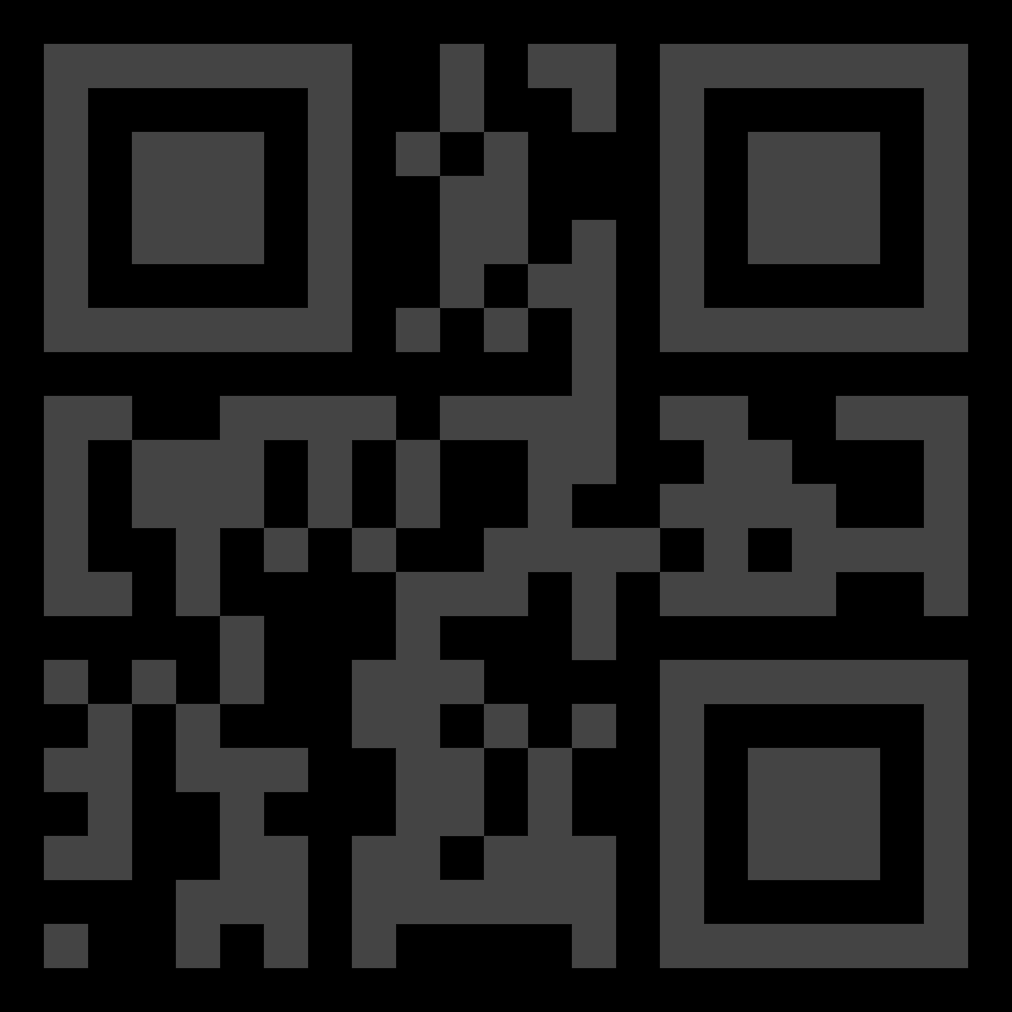

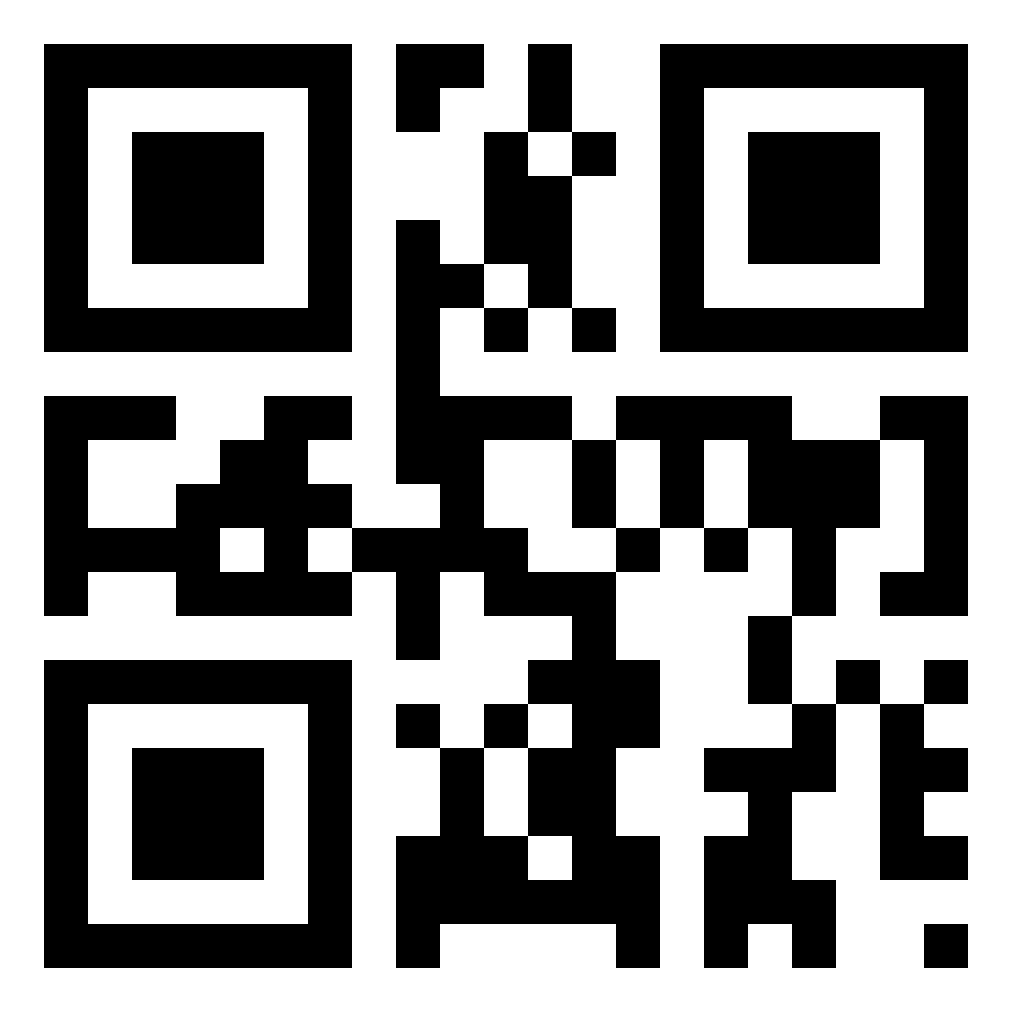

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# Read the image
image = cv2.imread("/content/04-Black-mirror.png")
inverted_image = 255 - image
# Flip the image horizontally
mirrored_image = cv2.flip(inverted_image, 1)
_, binary = cv2.threshold(mirrored_image, 200, 255, cv2.THRESH_BINARY)
# Display the original and mirrored images
cv2_imshow(image)
cv2_imshow( binary)
cv2.waitKey(0)
cv2.destroyAllWindows()

test case 5

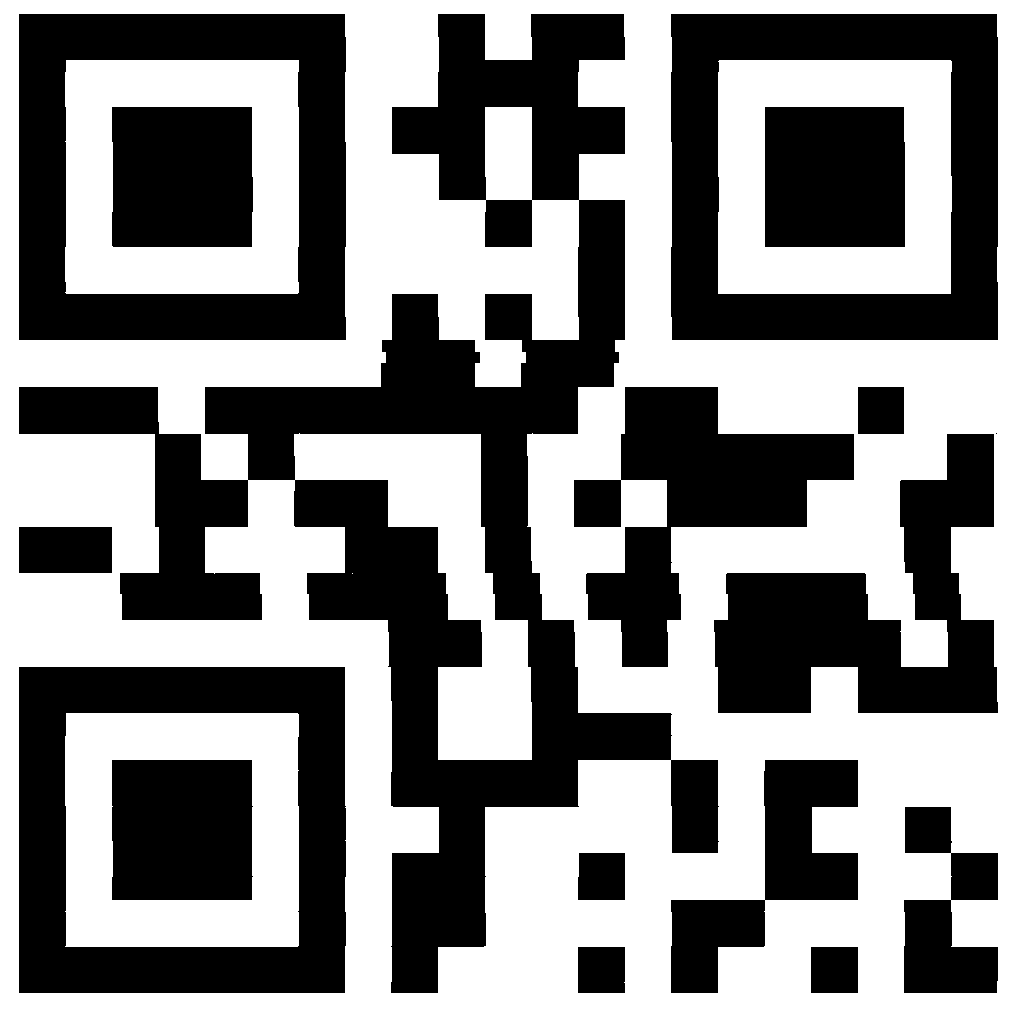

In [21]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def shifting_pixel(binary_qr_code):


  # Initialize the aligned QR code array
  aligned_qr_code_full = np.ones_like(binary_qr_code) * 255

  # Determine the expected x-coordinate of the alignment pattern from the left
  expected_positions = []
  for y in range(binary_qr_code.shape[0] // 2):  # only take the top half
    row = binary_qr_code[y, :]
    first_black_pixel_index = np.where(row == 0)[0]
    if first_black_pixel_index.size > 0:
        expected_positions.append(first_black_pixel_index[0])
  expected_x = int(np.median(expected_positions))

  # Determine the expected x-coordinate of the alignment pattern from the right
  expected_positions1 = []
  for y in range(binary_qr_code.shape[0] // 2):  # only take the top half
    row = binary_qr_code[y, ::-1]  # flip the row to process from right to left
    first_black_pixel_index = np.where(row == 0)[0]
    if first_black_pixel_index.size > 0:
        expected_positions1.append(first_black_pixel_index[0])
  expected_x_from_right = int(np.median(expected_positions1))

  # Align each row based on the expected x-coordinate
  for y, row in enumerate(binary_qr_code):
      first_black_pixel_index = np.where(row == 0)[0]
      if first_black_pixel_index.size > 0:
          shift_amount = expected_x - first_black_pixel_index[0]
          if abs(shift_amount) > 100:
              row_reversed = row[::-1]  # process from right to left
              first_black_pixel_index_reversed = np.where(row_reversed == 0)[0]
              if first_black_pixel_index_reversed.size > 0:
                  shift_amount = expected_x_from_right - first_black_pixel_index_reversed[0]
                  if abs(shift_amount) > 20:
                      shift_amount = 0
                  aligned_qr_code_full[y] = np.roll(row, -shift_amount)
          else:
              aligned_qr_code_full[y] = np.roll(row, shift_amount)

  return aligned_qr_code_full

# Example usage:

qr_code = cv2.imread('/content/05-Caesar-cipher.png', cv2.IMREAD_GRAYSCALE)

# Convert image to binary (black and white)
_, binary_qr_code = cv2.threshold(qr_code, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
aligned_image = shifting_pixel(binary_qr_code)
cv2.imwrite("testcase5sigma.jpg" , aligned_image)
cv2_imshow(aligned_image)

test case 6

(1011, 1011, 3)


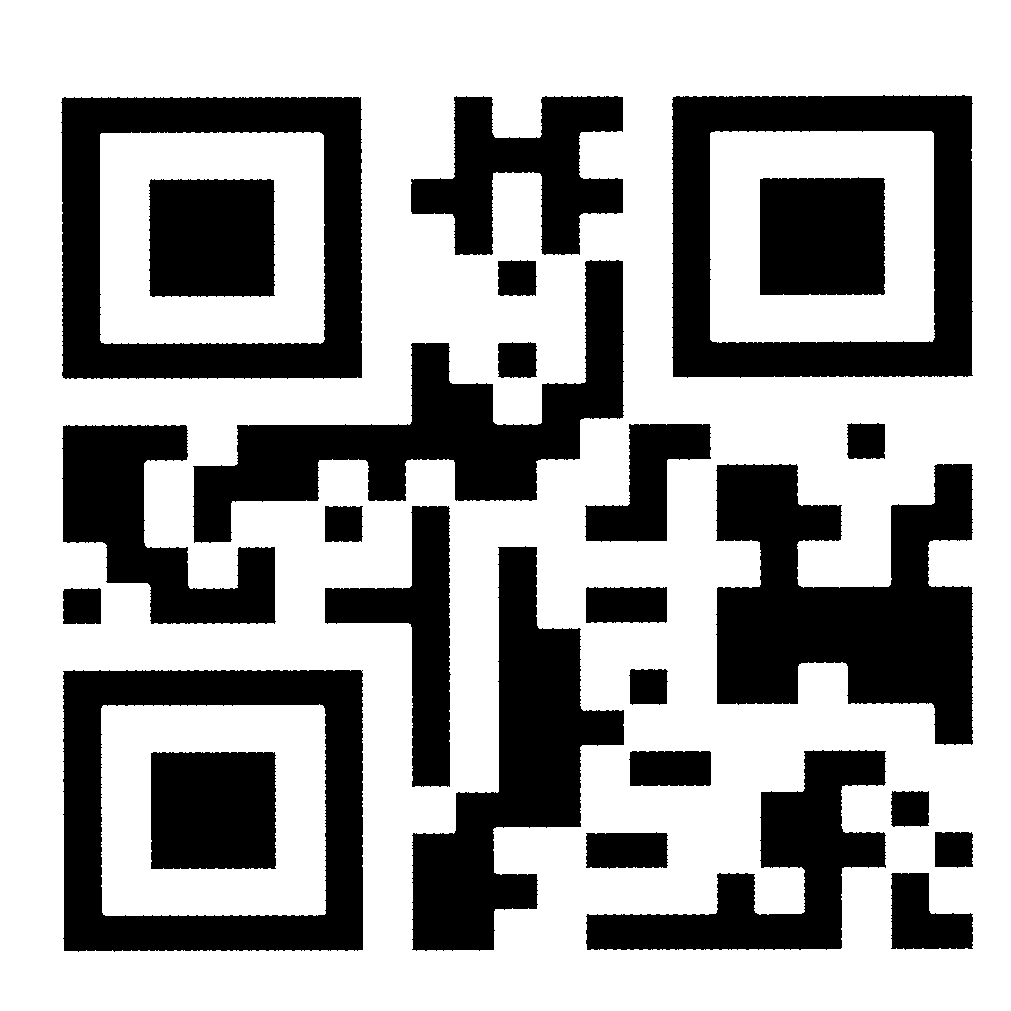

True

In [18]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/06-Railfence-cipher.png')

# Convert the img to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def get_corners(gray1):
  contours, hierarchy = cv2.findContours(gray1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  squares = []

  max_area = 0
  selected_contour = None
  for contour in contours:
      perimeter = cv2.arcLength(contour, True)
      approx = cv2.approxPolyDP(contour, 0.04 * perimeter, True)

      # Check if the polygon has at least 4 vertices
      if len(approx) >= 4:
          # Calculate the area of the contour
          area = cv2.contourArea(contour)
          if area > max_area:
              max_area = area
              selected_contour = approx

  # Convert the selected contour to a list of tuples for easier sorting
  contour_points = [tuple(point[0]) for point in selected_contour]

  # Find extreme points in each direction
  top_left = min(contour_points, key=lambda x: sum(x))
  top_right = max(contour_points, key=lambda x: (x[0], -x[1]))
  bottom_left = min(contour_points, key=lambda x: (x[0], -x[1]))
  bottom_right = max(contour_points, key=lambda x: sum(x))

  return top_left, top_right, bottom_left, bottom_right, selected_contour
def perspective(imageGray, imageBGR):
  img = imageGray
  original = imageBGR

  _, binary = cv2.threshold(img, 60, 255, cv2.THRESH_BINARY)

  # Apply edge detection method on the thresholded image
  edges = cv2.Canny(binary, 40, 150, apertureSize=3)

  # This returns an array of r and theta values
  lines = cv2. HoughLinesP(edges, 1,np. pi / 180, threshold=30, minLineLength=68, maxLineGap=220)
  img_with_lines = original.copy()
  if lines is not None:
      for line in lines:
          x1, y1, x2, y2 = line[0]
          cv2.line(img_with_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)

  # Display the image with detected lines
  img_with_lines_only = np.zeros_like(original)
  if lines is not None:
      for line in lines:
          x1, y1, x2, y2 = line[0]
          cv2.line(img_with_lines_only, (x1, y1), (x2, y2), (0, 0, 255), 2)

  gray1 = cv2.cvtColor(img_with_lines_only, cv2.COLOR_BGR2GRAY)
  # Find contours on the edge-detected image

  top_left, top_right, bottom_left, bottom_right, selected_contour = get_corners(gray1)

  selected_contour_sorted = selected_contour.reshape(-1, 2)
  selected_contour_sorted = selected_contour_sorted[np.argsort(selected_contour_sorted[:, 0])]

  # Determine top-left and bottom-left vertices
  if selected_contour_sorted[0][1] < selected_contour_sorted[1][1]:
      top_left = selected_contour_sorted[0]
      bottom_left = selected_contour_sorted[1]
  else:
      top_left = selected_contour_sorted[1]
      bottom_left = selected_contour_sorted[0]

  # Determine top-right and bottom-right vertices
  if selected_contour_sorted[2][1] < selected_contour_sorted[3][1]:
      top_right = selected_contour_sorted[2]
      bottom_right = selected_contour_sorted[3]
  else:
      top_right = selected_contour_sorted[3]
      bottom_right = selected_contour_sorted[2]

  if abs(bottom_right[0] - bottom_right[1]) < 60:
    bottom_right = (max(bottom_right), max(bottom_right))

  if abs(top_left[0] - top_left[1]) < 60:
    top_left = (min(top_left), min(top_left))


  rotated_corners = np.float32([bottom_left, bottom_right, top_left, top_right])

  # Define the corrected region (adjust dimensions as needed)
  new_corners = np.float32([bottom_left, [top_right[0], bottom_left[1]], [bottom_left[0], top_right[1]], top_right])


  # Compute the perspective transformation matrix
  perspective_matrix = cv2.getPerspectiveTransform(rotated_corners, new_corners)

  # Apply the perspective transformation to the image
  corrected_image = cv2.warpPerspective(original, perspective_matrix, (1011, 1011))
  return corrected_image

final_rotated=perspective(gray,img)


blurred = cv2.GaussianBlur(final_rotated, (7, 7), 0)
gray_blurred = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

# Applying threshold
threshold = cv2.threshold(gray_blurred, 0, 255,
    cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

# Apply the Component analysis function
analysis = cv2.connectedComponentsWithStats(threshold,
                                            4,
                                            cv2.CV_32S)
(totalLabels, label_ids, values, centroid) = analysis

# Initialize a new image to store
# all the output components
print(final_rotated.shape)
height, width, channels = final_rotated.shape
output = np.zeros((height, width, 1), dtype=np.uint8)

# Loop through each component
for i in range(1, totalLabels):

      # Area of the component
    area = values[i, cv2.CC_STAT_AREA]

    if (area > 0) and (area < 1600):

        componentMask = (label_ids == i).astype("uint8") * 255
        output = cv2.bitwise_or(output, componentMask)
output = cv2.cvtColor(output, cv2.COLOR_GRAY2BGR)
# output =255-output
final_rotated=255 -final_rotated
final2=final_rotated - output
final2=255 -final2
_, final2= cv2.threshold(final2, 0, 255, cv2.THRESH_BINARY)
kernel = np.ones((2,1), np.uint8)  # The size of the kernel affects the extent of erosion
final2 = cv2.dilate(final2, kernel, iterations=1)
# cv2_imshow(img)
# cv2_imshow(final_rotated)
cv2_imshow(final2)
# cv2_imshow(output)
cv2.imwrite('6edited.jpg',final2)
#cv2_imshow(rotated_image)
# Exiting the window if 'q' is pressed on the keyboard.
#if cv2.waitKey(0) & 0xFF == ord('q'):
 #   cv2.destroyAllWindows()


test case 7

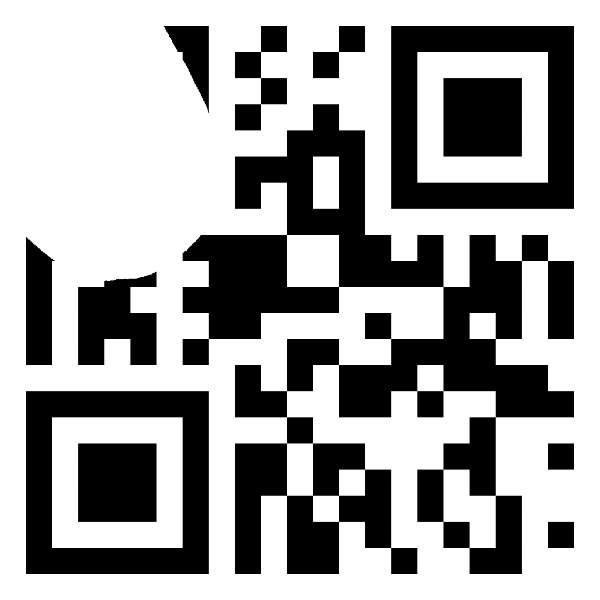

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# Load the image
image = cv2.imread('/content/07-THE-MIGHTY-FINGER.png', cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print("Error: Unable to load image.")
    exit()

# Apply thresholding with a threshold value of 127
threshold_value = 50
_, thresholded_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

# Resize the thresholded image to 1012x1012
resized_image = cv2.resize(thresholded_image, (600, 600))

# Display the resized thresholded image
cv2_imshow( resized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

test case 8

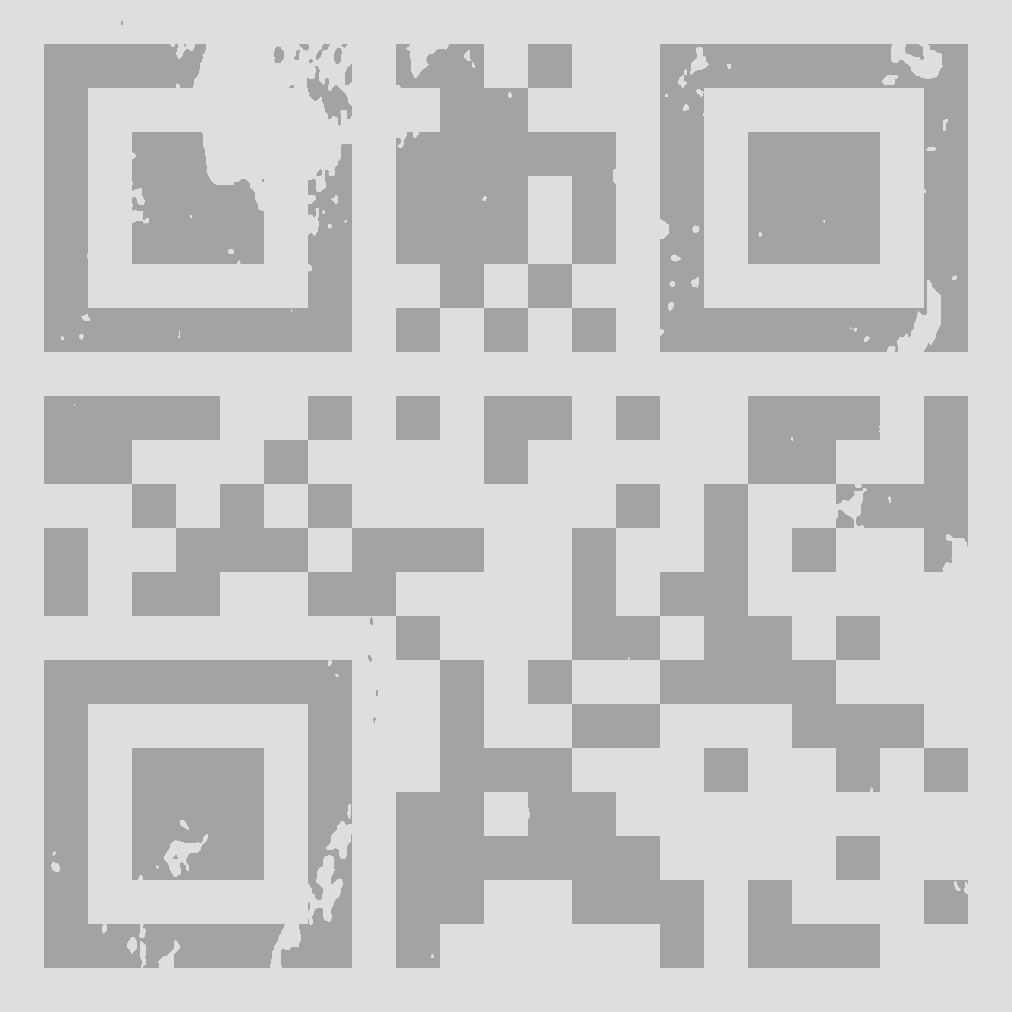

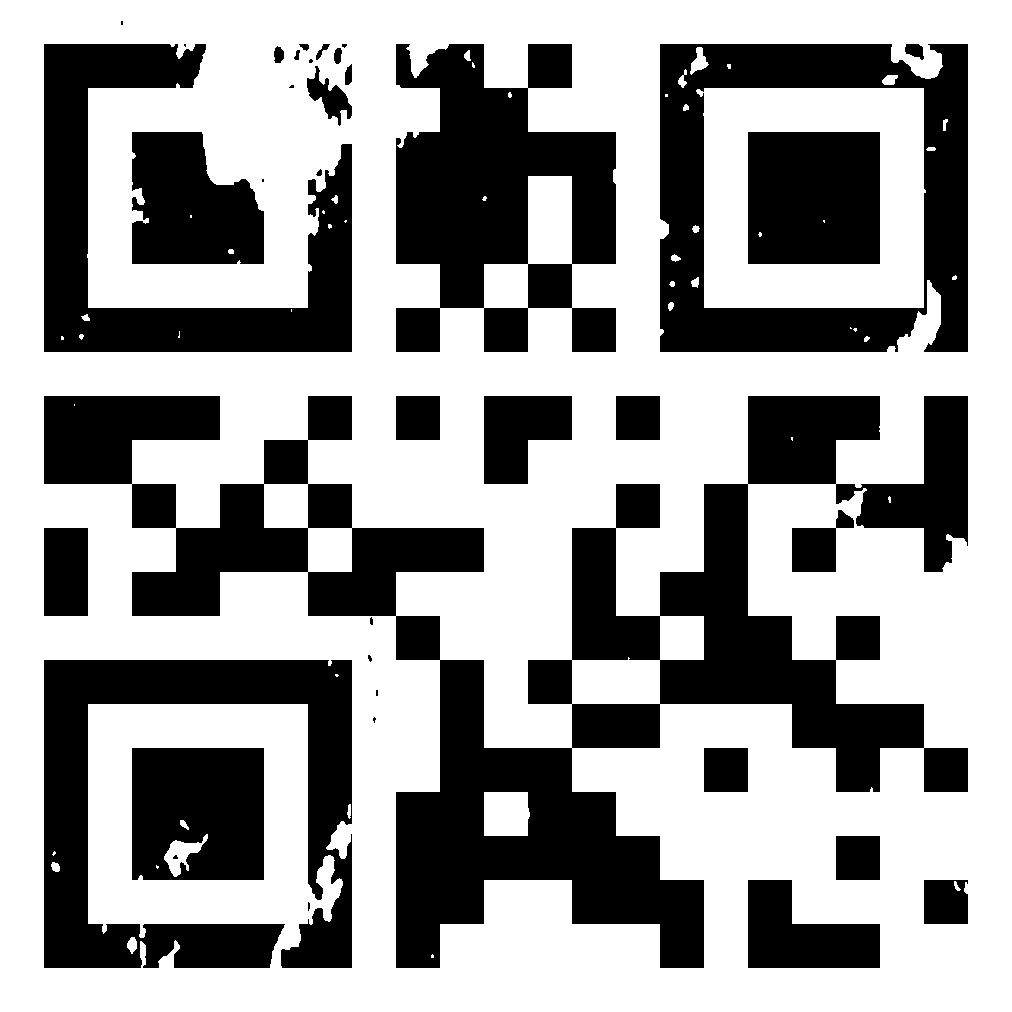

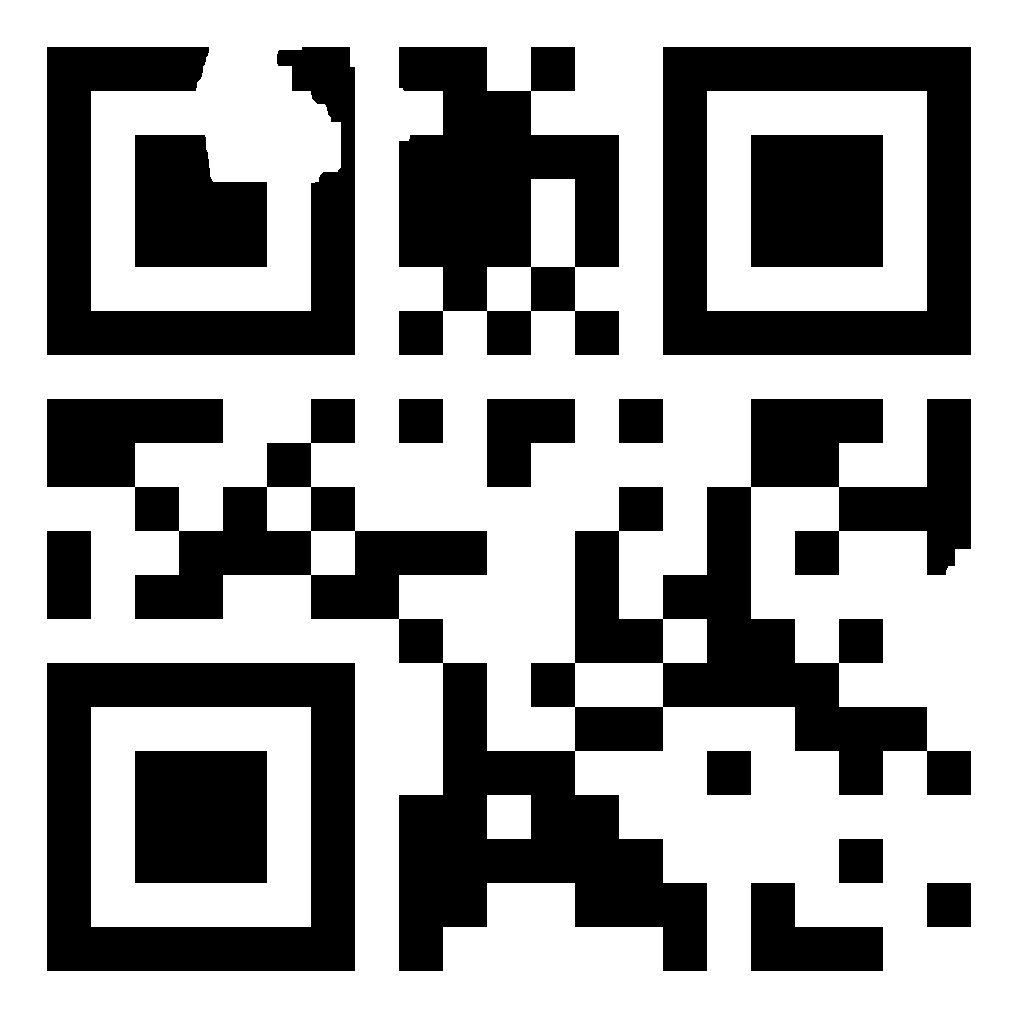

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread('/content/08-Compresso-Espresso.png')

# Preprocess the image
# preprocessed_image = preprocess_image(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
final= cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                          cv2.THRESH_BINARY, 199, 5)
kernel1 = np.ones((30, 20), np.uint8)
denoised_image = cv2.morphologyEx(final, cv2.MORPH_OPEN, kernel1)
kernel = np.ones((6, 6), np.uint8)
denoised_image = cv2.morphologyEx(denoised_image, cv2.MORPH_CLOSE, kernel)
kernel2 = np.ones((44, 44), np.uint8)
denoised_image = cv2.morphologyEx(denoised_image, cv2.MORPH_OPEN, kernel2)
cv2.imwrite('processed_image8.jpg', denoised_image)

# Display the original and preprocessed images
cv2_imshow(image)
# cv2_imshow(preprocessed_image)
cv2_imshow(final)
cv2_imshow(denoised_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

test case 9

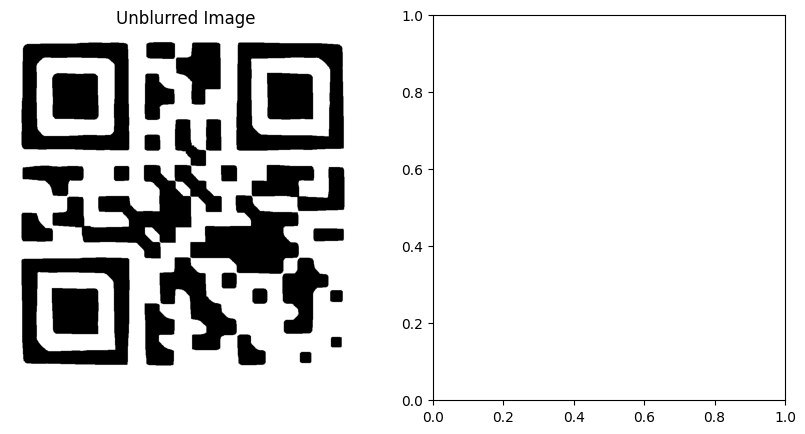

In [ ]:
import cv2
import numpy as np

image_blurred= cv2.imread("/content/09-My-phone-fell-while-taking-this-one-...-or-did-it.png", cv2.IMREAD_GRAYSCALE)


# Apply a sharpening filter
sharpening_kernel = np.array([[-3, -3, -3],
                              [-3, 32, -3],
                              [-3, -3, -3]])
sharpened = cv2.filter2D(image_blurred, -1, sharpening_kernel)


# Apply adaptive thresholding to create a binary image
_, binary = cv2.threshold(sharpened, 170, 255, cv2.THRESH_BINARY)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (8, 8))

dilated = cv2.erode(binary, kernel, iterations=1)

kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))

kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))



dilated = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel3, iterations=1)

dilated = cv2.erode(dilated, kernel, iterations=2)


cv2.imwrite('testcase9_(2).jpg',dilated)


fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# axes[0].imshow(image_blurred, cmap='gray')
# axes[0].set_title('Original Image')
# axes[0].axis('off')

axes[0].imshow(dilated, cmap='gray')
axes[0].set_title('Unblurred Image')
axes[0].axis('off')

plt.show()

test case 10

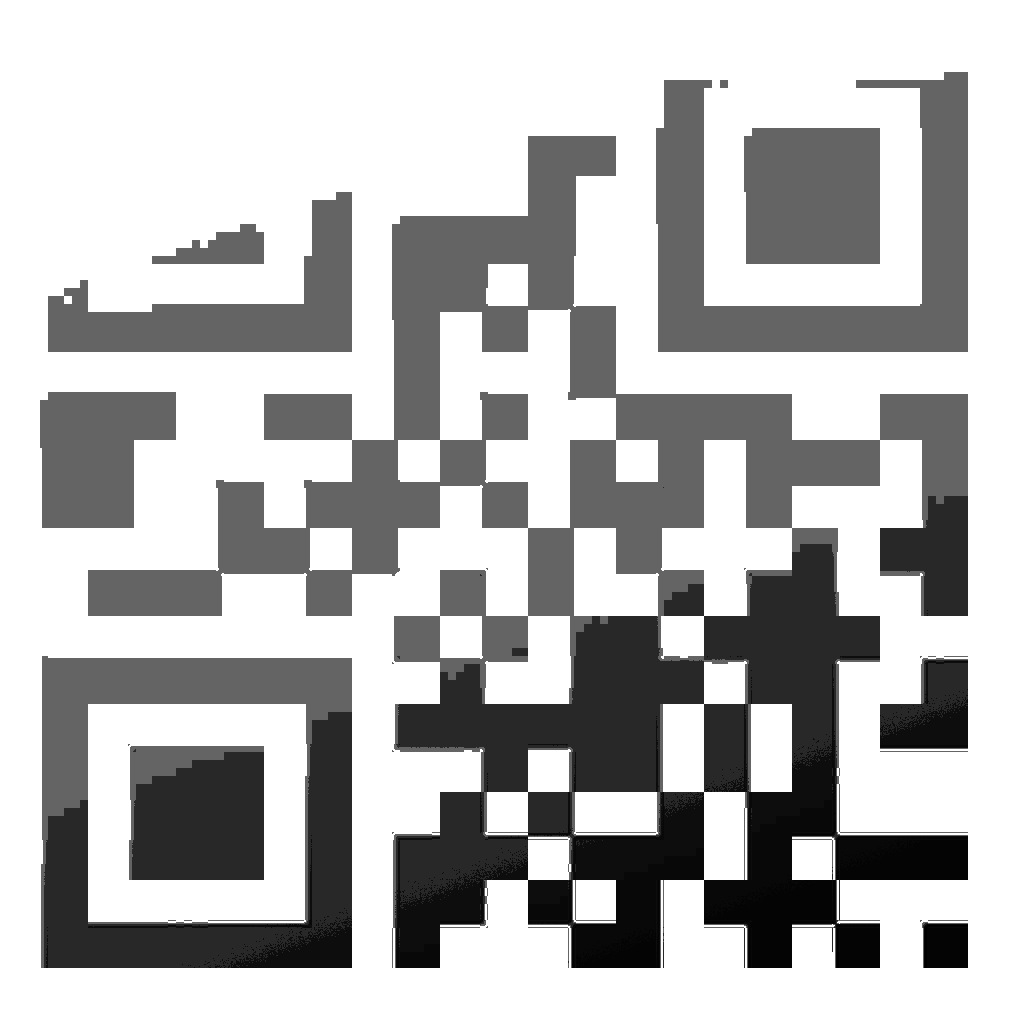

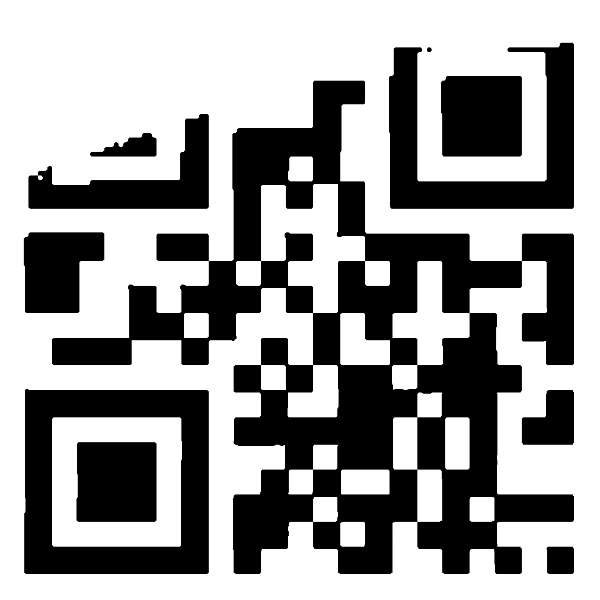

In [19]:
import cv2
import numpy as np


# Function to perform histogram equalization
def histogram_equalization(img):
    equalized_img = cv2.equalizeHist(img)
    cv2_imshow(equalized_img)
    return equalized_img


# Thresholding function
def apply_threshold(img, threshold_value):
    _, thresholded_img = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)
    return thresholded_img


# Apply Gaussian filter
def apply_gaussian_filter(img, kernel_size):
    blurred_img = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
    return blurred_img


# Apply Median filter
def apply_median_filter(img, kernel_size):
    median_img = cv2.medianBlur(img, kernel_size)
    return median_img


# Load image
image = cv2.imread('/content/10-Gone-With-The-Wind.png', cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_image = histogram_equalization(image)

# Apply thresholding with threshold value of 250
threshold_value = 250
thresholded_image = apply_threshold(equalized_image, threshold_value)

# Apply Gaussian filter
gaussian_filtered_image = apply_gaussian_filter(thresholded_image, kernel_size=5)

# Apply Median filter
median_filtered_image = apply_median_filter(thresholded_image, kernel_size=5)

# Output the final processed image
output_image = median_filtered_image

# Save the final processed image
resized_image = cv2.resize(output_image, (600, 600))
cv2.imwrite('10edited.jpg', resized_image)

# Display the final processed image
cv2_imshow( resized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

test case 11

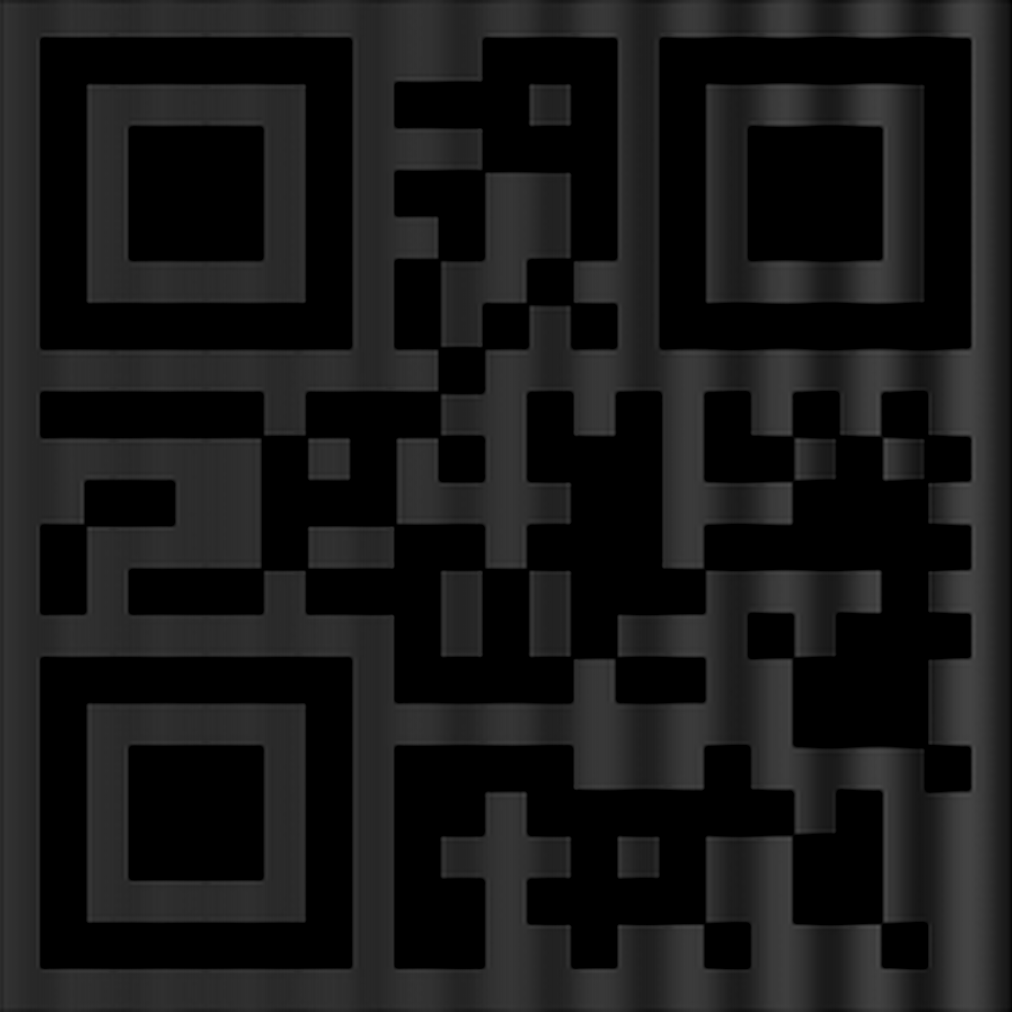

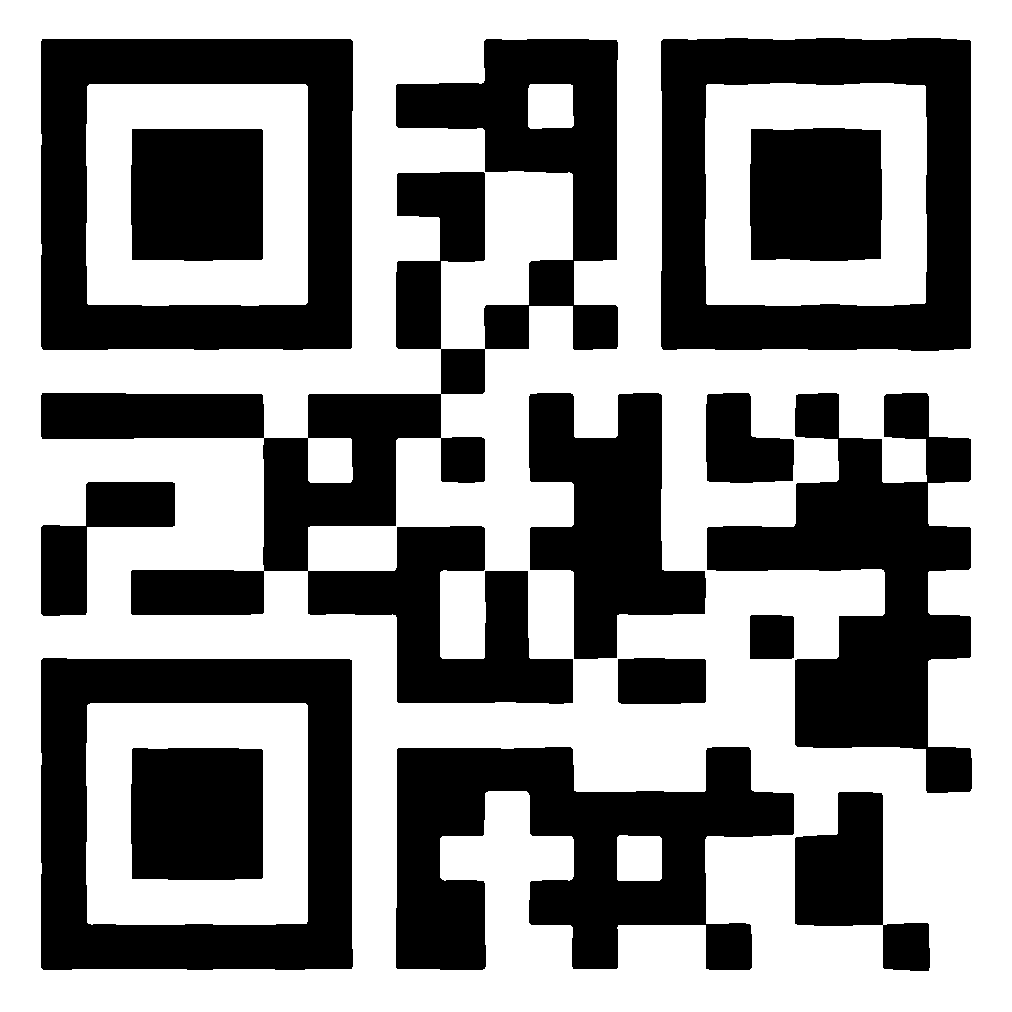

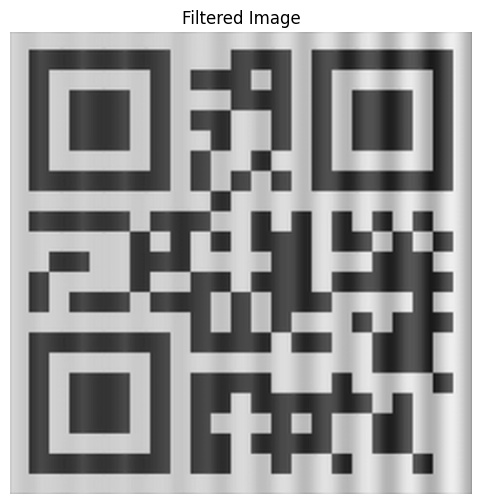

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def find_peaks(magnitude_spectrum, threshold):
    # Threshold the magnitude spectrum
    thresholded_spectrum = magnitude_spectrum > threshold

    # Find peaks in the thresholded spectrum
    peaks = np.argwhere(thresholded_spectrum)

    return peaks

def notch_reject_filter(image, peaks):
    # Calculate the Fourier transform of the image
    spec_orig = np.fft.fft2(image)
    spec_img = np.fft.fftshift(spec_orig)

    # Apply notch filter to remove specified frequencies
    for peak in peaks:
        n, j = peak
        spec_img[n, j] = 0

    # Reconstruct the image using inverse Fourier transform
    filtered_image = np.real(np.fft.ifft2(np.fft.ifftshift(spec_img)))
    return filtered_image

# Load the image
pat1 = cv2.imread('/content/11-weewooweewooweewoo.png', cv2.IMREAD_GRAYSCALE)

# Calculate the Fourier transform of the image
spec_orig = np.fft.fft2(pat1)
spec_img = np.fft.fftshift(spec_orig)
magnitude_spectrum = np.log(np.abs(spec_img) + 1)

# Find peaks in the magnitude spectrum
peaks = find_peaks(magnitude_spectrum, threshold=16)

# Apply notch filter to remove periodic noise
filtered_image = notch_reject_filter(pat1, peaks)
def preprocess_image(image):
    """
    Preprocess an input image by adjusting intensity, contrast, and brightness, reducing noise,
    and applying morphological operations if needed.

    Args:
    - image (numpy.ndarray): Input image.

    Returns:
    - preprocessed_image (numpy.ndarray): Preprocessed image.
    """
    # Convert image to grayscale
    # gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate mean intensity and standard deviation
    mean_intensity = np.mean(image)
    std_dev_intensity = np.std(image)

    # Adjust contrast
    target_std_dev = 50  # Target standard deviation for contrast adjustment
    contrast_ratio = target_std_dev / std_dev_intensity
    adjusted_image = image * contrast_ratio

    # Adjust brightness
    target_mean_intensity = 127  # Target mean intensity for brightness adjustment
    brightness_offset = target_mean_intensity - mean_intensity
    adjusted_image += brightness_offset

    # Clip intensity values to [0, 255]
    adjusted_image = np.clip(adjusted_image, 0, 255)

    # Convert adjusted image back to uint8 datatype
    adjusted_image = adjusted_image.astype(np.uint8)
    return adjusted_image

final=preprocess_image(filtered_image)
final= cv2.adaptiveThreshold(final, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                          cv2.THRESH_BINARY, 199, 5)
kernel1 = np.ones((14, 14), np.uint8)
final = cv2.morphologyEx(final, cv2.MORPH_CLOSE, kernel1)

# Display the filtered image
plt.figure(figsize=(8, 6))
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')
cv2_imshow(filtered_image)
cv2_imshow(final)

plt.axis('off')
plt.show()

test case 12

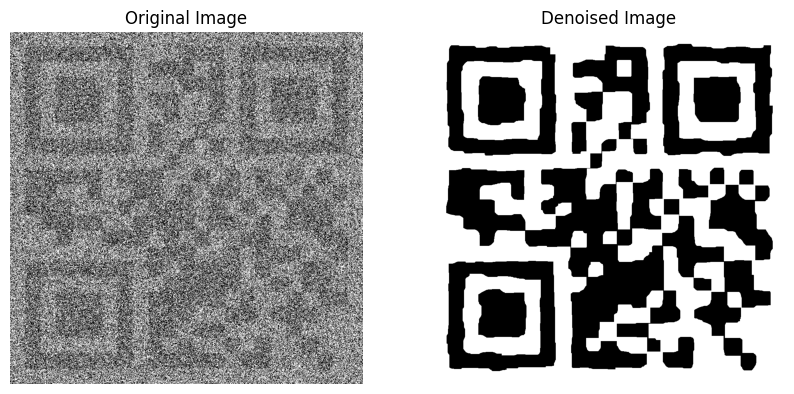

In [ ]:

#   salt and pepper median filter

def remove_salt_and_pepper_noise(image_salt, kernel_size=21):


    kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 21))
    kernel4 = cv2.getStructuringElement(cv2.MORPH_RECT, (11, 11))

    denoised_image = cv2.blur(image_salt, (11, 11))

    _, denoised_image = cv2.threshold(denoised_image, 125, 255, cv2.THRESH_BINARY)


    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))


    denoised_image = cv2.medianBlur(denoised_image, kernel_size)

    denoised_image = cv2.morphologyEx(denoised_image, cv2.MORPH_CLOSE, kernel4, iterations=2)


    # Apply closing to enhance the remaining features of the QR code

    kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
    kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 21))
    kernel4 = cv2.getStructuringElement(cv2.MORPH_RECT, (17, 17))


    denoised_image = cv2.morphologyEx(denoised_image, cv2.MORPH_OPEN, kernel2, iterations=4)



    return denoised_image



image_salt= cv2.imread("/content/12-mal7-w-felfel.png", cv2.IMREAD_GRAYSCALE)


_, image_salt = cv2.threshold(image_salt, 128, 255, cv2.THRESH_BINARY)

denoised_image = remove_salt_and_pepper_noise(image_salt)



fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image_salt, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')


axes[1].imshow(denoised_image, cmap='gray')
axes[1].set_title('Denoised Image')
axes[1].axis('off')

plt.show()

test case 13

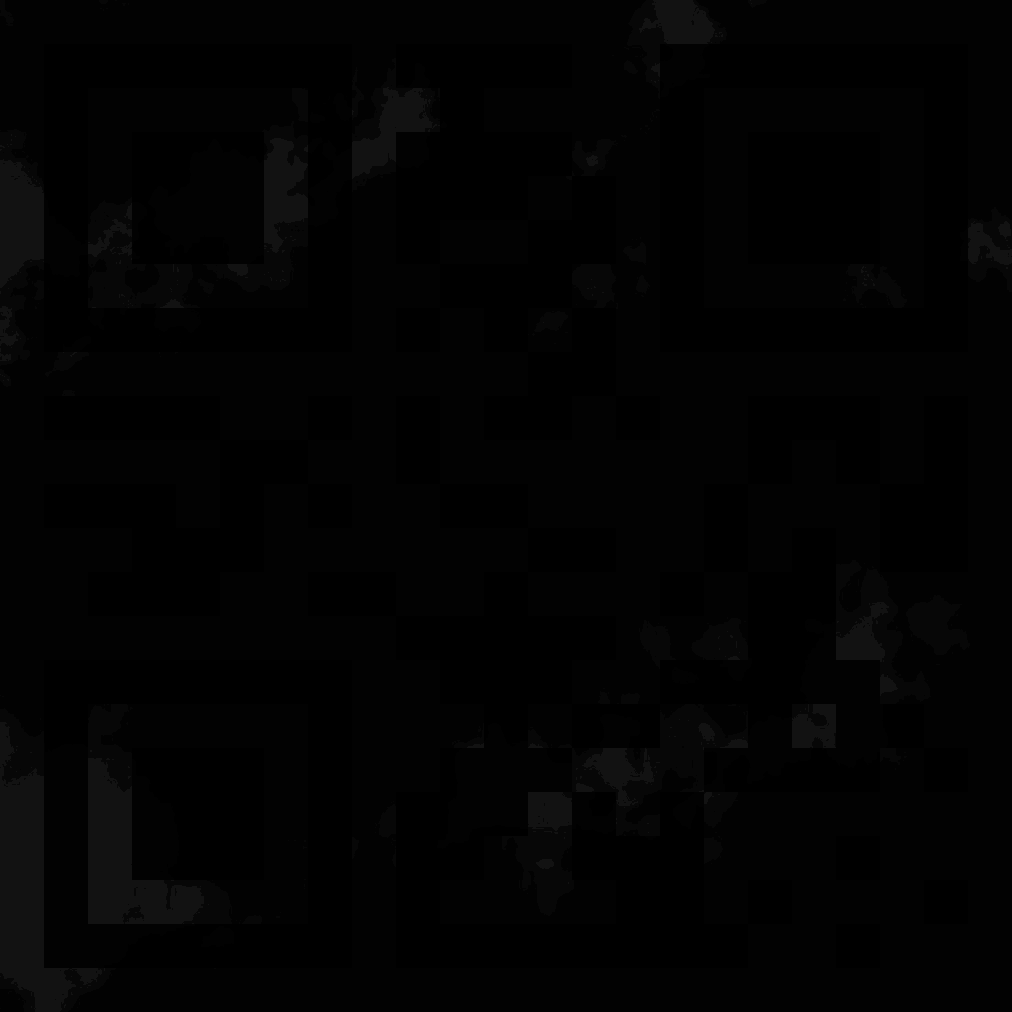

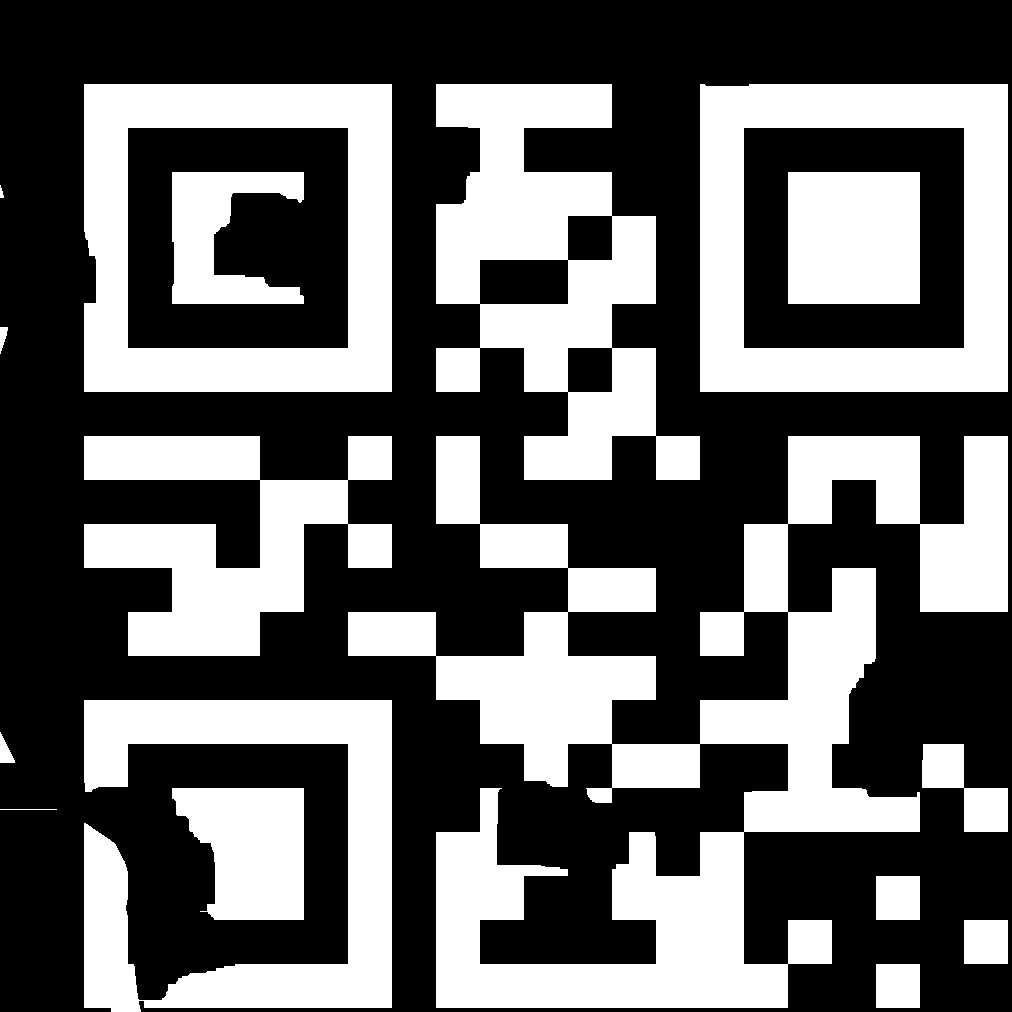

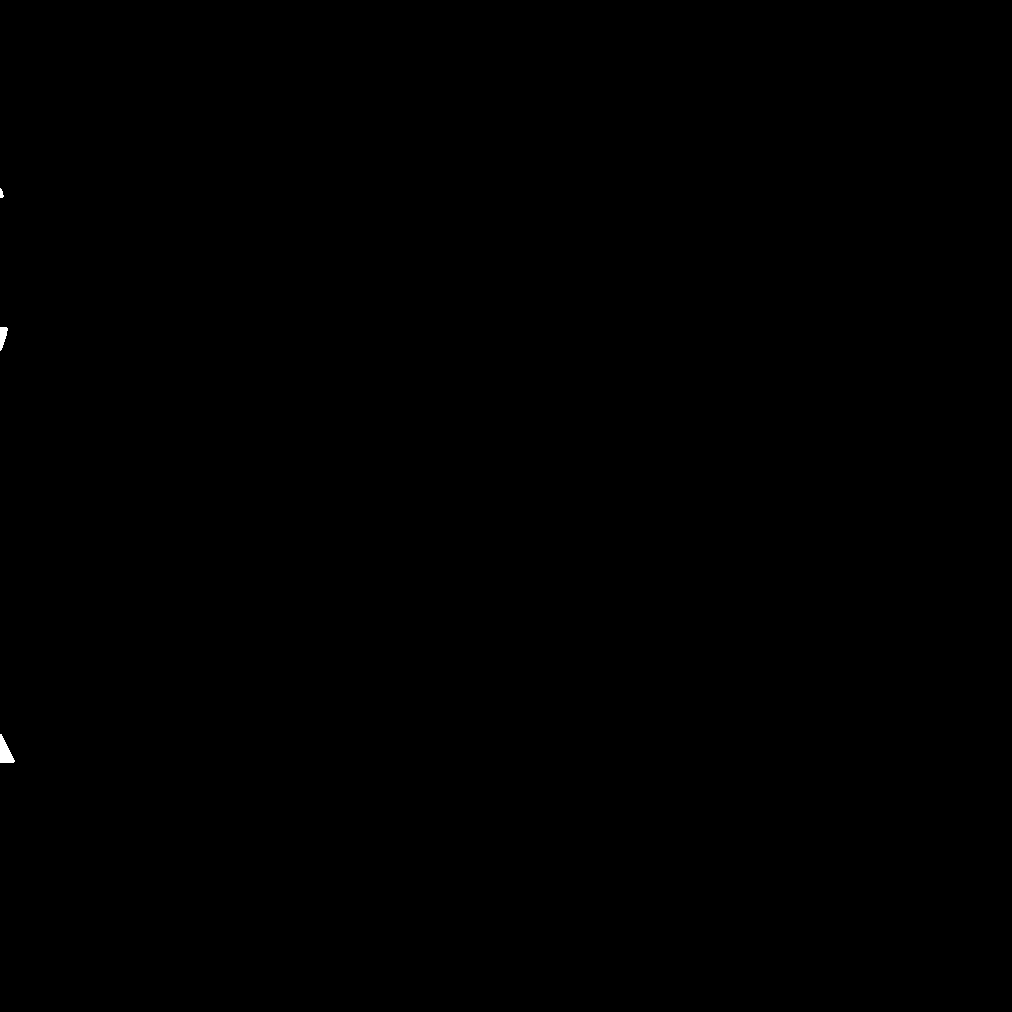

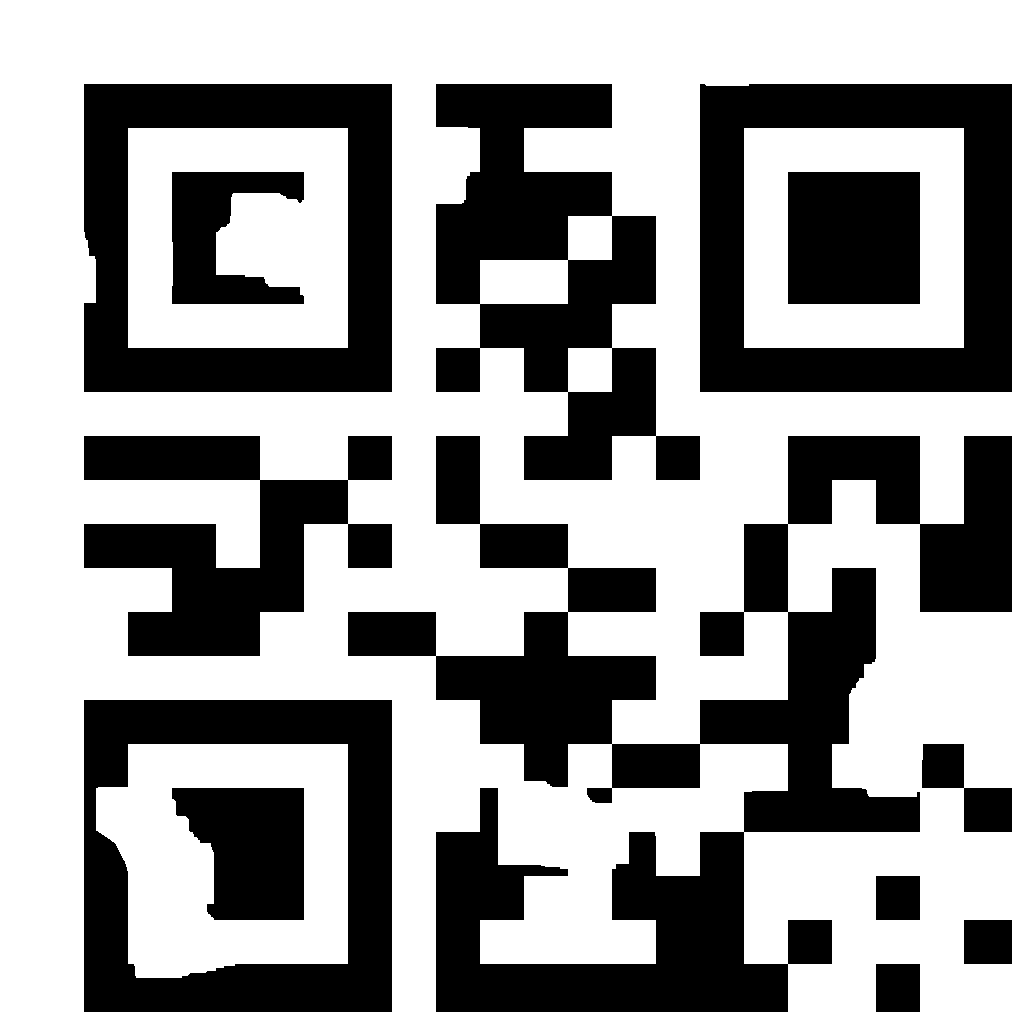

In [14]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
def preprocess_image(image):

    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate mean intensity and standard deviation
    mean_intensity = np.mean(gray_image)
    std_dev_intensity = np.std(gray_image)

    # Adjust contrast
    target_std_dev = 150  # Target standard deviation for contrast adjustment
    contrast_ratio = target_std_dev / std_dev_intensity
    adjusted_image = gray_image * contrast_ratio

    # Adjust brightness
    target_mean_intensity = 150  # Target mean intensity for brightness adjustment
    brightness_offset = target_mean_intensity - mean_intensity
    adjusted_image += brightness_offset

    # Clip intensity values to [0, 255]
    adjusted_image = np.clip(adjusted_image, 0, 255)

    # Convert adjusted image back to uint8 datatype
    adjusted_image = adjusted_image.astype(np.uint8)

    # Apply noise reduction techniques if noise is present
    if std_dev_intensity > 10:  # Check if standard deviation exceeds a threshold indicating noise
        # Apply Gaussian blur for Gaussian noise reduction
        blurred_image = cv2.GaussianBlur(adjusted_image, (5, 5), 0)

        # Apply median blur for salt and pepper noise reduction
        denoised_image = cv2.medianBlur(blurred_image, 11)

        # Apply bilateral filter for speckle noise reduction
        denoised_image = cv2.bilateralFilter(denoised_image, 9, 75, 75)
        d=cv2.adaptiveThreshold(denoised_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                          cv2.THRESH_BINARY, 199, 5)
        cv2_imshow(d)

        return denoised_image
    else:
        return adjusted_image


# Load the image
image = cv2.imread('/content/13-2el-noor-2ata3.png')

# Preprocess the image
preprocessed_image = preprocess_image(image)
kernel_size = 9
kernel = np.ones((kernel_size, kernel_size), np.uint8)

#  Apply morphological operations
#  Erode to remove white noise and small white spots
eroded_image = cv2.erode(preprocessed_image, kernel, iterations=5)

#  Dilate to restore the eroded main objects
dilated_image = cv2.dilate(eroded_image, kernel, iterations=5)

kernel_size = 2
kernel = np.ones((kernel_size, kernel_size), np.uint8)

eroded_image = cv2.erode(dilated_image, kernel, iterations=40)
dilated_image = cv2.dilate(eroded_image, kernel, iterations=40)
kernel = np.ones((1,  1), np.uint8)
dilated_image = cv2.dilate(dilated_image, kernel, iterations=1)
threshold = cv2.threshold(dilated_image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

final= cv2.adaptiveThreshold(dilated_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                          cv2.THRESH_BINARY, 199, 5)

# Applying 7x7 Gaussian Blur
blurred = cv2.GaussianBlur(final, (7, 7), 0)

# Applying threshold
threshold = cv2.threshold(blurred, 0, 255,
    cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

# Apply the Component analysis function
analysis = cv2.connectedComponentsWithStats(threshold,
                                            4,
                                            cv2.CV_32S)
(totalLabels, label_ids, values, centroid) = analysis

# Initialize a new image to store
# all the output components
output = np.zeros(final.shape, dtype="uint8")

# Loop through each component
for i in range(1, totalLabels):

      # Area of the component
    area = values[i, cv2.CC_STAT_AREA]

    if (area > 0) and (area < 400):
        componentMask = (label_ids == i).astype("uint8") * 255
        output = cv2.bitwise_or(output, componentMask)

# output =255-output
final=255 -final
final2=final-output
final2=255 -final2
kernel = np.ones((5,  1), np.uint8)
final2 = cv2.dilate(final2, kernel, iterations=1)
final2 = cv2.erode(final2, kernel, iterations=1)

kernel = np.ones((43,  43), np.uint8)
final2 = cv2.erode(final2, kernel, iterations=1)
final2 = cv2.dilate(final2, kernel, iterations=1)

cv2.imwrite('13edited.jpg',final2)
# Display the original and preprocessed images
cv2_imshow(image)
cv2_imshow(final)
cv2_imshow(output)
cv2_imshow(final2)
cv2.waitKey(0)
cv2.destroyAllWindows()

test case 14

Top Left: [575 562]
Top Right: [694 517]
Bottom Left: [620 680]
Bottom Right: [735 630]


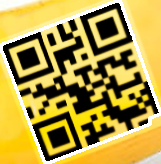

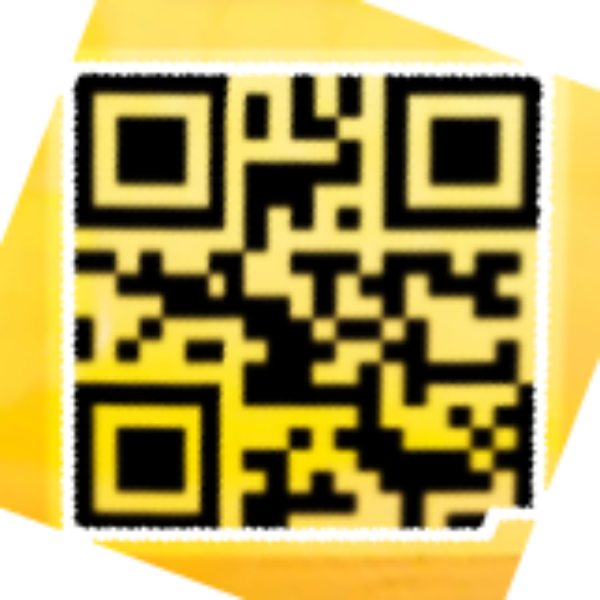

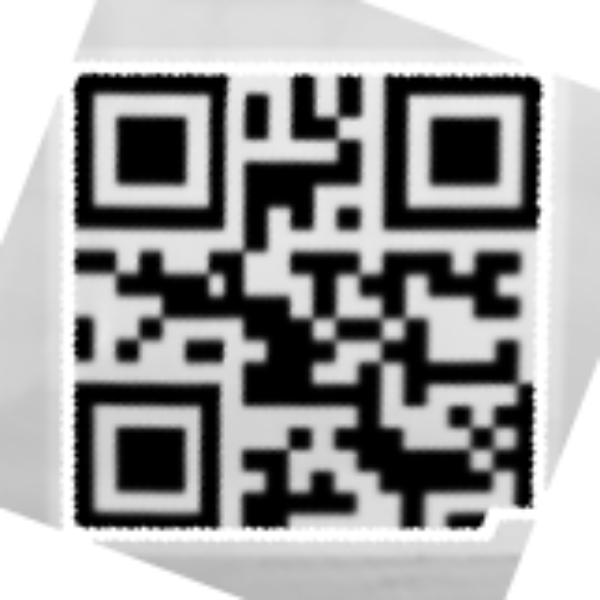

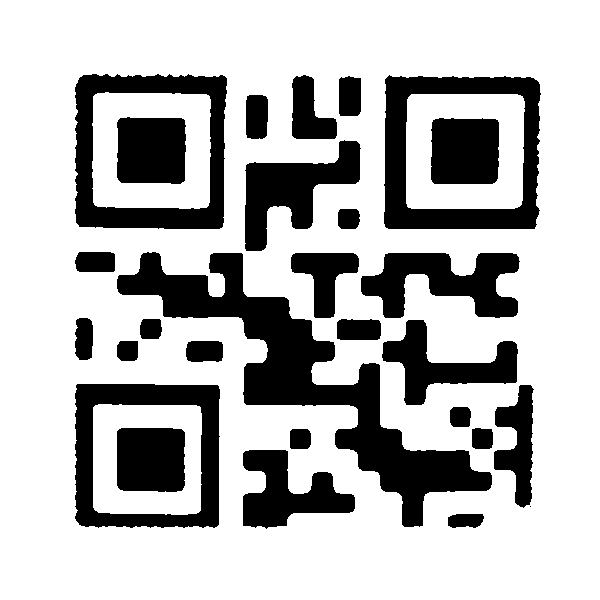

True

In [ ]:
# Load the image
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/14-BANANAAA!!!.png')

# Convert the img to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding
_, binary = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY)

# Apply edge detection method on the thresholded image
edges = cv2.Canny(binary, 40, 150, apertureSize=3)

# This returns an array of r and theta values
lines = cv2. HoughLinesP(edges, 1,np. pi / 180, threshold=30, minLineLength=68, maxLineGap=220)
img_with_lines = img.copy()
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img_with_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the image with detected lines
img_with_lines_only = np.zeros_like(img)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img_with_lines_only, (x1, y1), (x2, y2), (0, 0, 255), 2)


gray1 = cv2.cvtColor(img_with_lines_only, cv2.COLOR_BGR2GRAY)
# Find contours on the edge-detected image
contours, hierarchy = cv2.findContours(gray1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
squares = []

max_area=0
selected_contour=None
for contour in contours:
    perimeter = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.04 * perimeter, True)

    # Check if the polygon has 4 vertices
    if len(approx) == 4:
        # Calculate the area of the contour
      area = cv2.contourArea(contour)
      if area > max_area:
          max_area = area
          selected_contour = approx

          top_right,top_left, bottom_left, bottom_right=selected_contour.reshape(-1,2)

        # Print or use the coordinates as needed
      print("Top Left:", top_left)
      print("Top Right:", top_right)
      print("Bottom Left:", bottom_left)
      print("Bottom Right:", bottom_right)


      rotated_corners = np.float32([bottom_left, bottom_right, top_left, top_right])

# Draw contours on a new copy of the original image
cv2.drawContours(img,contours, -1, (255, 255, 255), 2)

# Display the image with contours
# Get the bounding box of the detected contours
x, y, w, h = cv2.boundingRect(selected_contour)

# Crop the detected object from the original image
detected_object = img[y:y+h, x:x+w]
cv2_imshow(detected_object)

def rotate_qr_code(image, shift_x):
    """
    Rotate the QR code in the image based on the detected lines using Hough transform and move the frame to the right.
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)
    if lines is None:
        return image  # Return the original image if no lines are detected
    # Compute the angle of tilt
    angles = []
    for line in lines:
        rho, theta = line[0]
        angles.append(theta)

    aligned = all(abs(np.degrees(theta) % 90) < 10 for theta in angles)  # 10 degrees tolerance

    if aligned:
        return image  # Return the original image if QR code is aligned

    median_angle = np.median(angles)
    #angle_adjustment = np.degrees(median_angle) -180   # subtract 90 to make it clockwise rotation

    angle_deg = np.degrees(median_angle)
    nearest_90 = 90 * round(angle_deg / 90)
    #angle_adjustment = nearest_90 - angle_deg
    angle_adjustment = angle_deg - nearest_90

    # Rotate the QR code only
    height, width = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((width / 2 + shift_x, height / 2), angle_adjustment, 1)

    # Apply translation to move the frame to the right
    rotation_matrix[0, 2] += shift_x

    # Apply replicate padding
    pad_size = shift_x
    padded_image = cv2.copyMakeBorder(image, 0, 0, pad_size, pad_size, cv2.BORDER_REPLICATE)

    # Create a white canvas of the same size as the input image
    white_canvas = np.ones_like(image) * 255

    # Rotate the image and blend it onto the white canvas with white border
    rotated_image = cv2.warpAffine(padded_image, rotation_matrix, (width + pad_size * 2, height), borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255))
    rotated_on_white = cv2.warpAffine(white_canvas, rotation_matrix, (width + pad_size * 2, height), borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255))

    # Mask out the rotated QR code from the white canvas
    result = cv2.bitwise_and(rotated_image, rotated_image, mask=cv2.cvtColor(rotated_on_white, cv2.COLOR_BGR2GRAY))

    return result

# Load the QR code image

image = detected_object

# Move the frame to the right by 20 pixels
shift_x = 0

# Rotate the QR code only based on detected horizontal lines and move the frame to the right
rotated_qr_code = rotate_qr_code(image, shift_x)

# Resize the image to 600x600
resized_image = cv2.resize(rotated_qr_code, (600, 600))

# Display the resized image
# cv2_imshow(resized_image)
# x, y, w, h = cv2.boundingRect(selected_contour)

# Crop the detected object from the original image
# detected_object = resized_image[y:y+h, x:x+w]
cv2_imshow(resized_image)
detected_object = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(detected_object)
# Apply binary thresholding
# Set the threshold value to a low number close to black, e.g., 50
# Pixels with values below 50 will be set to 0 (black), and those above will be set to 255 (white)
_, detected_object = cv2.threshold(detected_object, 80, 255, cv2.THRESH_BINARY)

cv2_imshow(detected_object)
cv2.imwrite('banana.jpg',detected_object)

test case 15

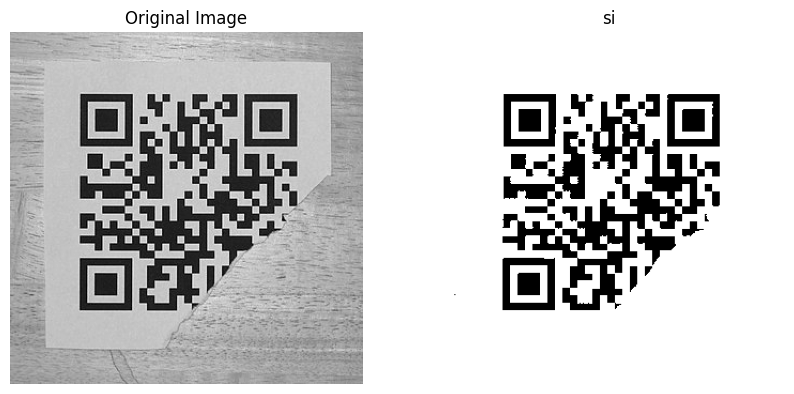

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_beast = cv2.imread("/content/15-beast-mode-computer-vision-(this-one-is-from-wikipedia).jpg", cv2.IMREAD_GRAYSCALE)

_, binary_beast = cv2.threshold(image_beast, 80, 255, cv2.THRESH_BINARY)


kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))



beast_beast = cv2.morphologyEx(binary_beast, cv2.MORPH_CLOSE, kernel, iterations=1)





# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display original image
axes[0].imshow(image_beast, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display unblurred image
axes[1].imshow(beast_beast, cmap='gray')
axes[1].set_title('si')
axes[1].axis('off')

plt.show()
